**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read Data**

In [ ]:
data = pd.read_csv('IMDB/IMDB.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Data Preproceswsing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.replace(['positive', 'negative'], [1,0], inplace = True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Covert Review column in to lower case**

In [ ]:
# Convert text column to lowercase
data['review'] = data['review'].str.lower()

**Print Review into list**

In [ ]:
rv =[]
for rev in data.review:
  rv.append(rev)

In [ ]:
#rv

**Sentence Tokenization**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
for r in rv:
  sentences = nltk.sent_tokenize(r)
 # print(sentences)

**Import Regular Expression**

In [ ]:
import re

****Import Stop word , word Tokenize and Lemmatizaton**** 

In [ ]:
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stopwords = stop_words.remove('not')

In [ ]:
p_data = []
for i in range(len(data.review)):
    cleaning = re.compile('<.*?>')                          # Pattern for removing html tags
    cleaning1 = re.compile('[^aA-zZ0-9]+')                  # Pattern for removing all the punctuations, commas, and other characters which can act as noise in data
    review = re.sub(cleaning, '', data.review.iloc[i])      # First substituing all the html tags with empty space
    review = re.sub(cleaning1, ' ', review)                 # Then substitutin all irrelevant characters with a single space
    
    tokens = word_tokenize(review)                          # Splitting the reviews into individual words (tokenization)
    
    del review
    
    swords = []                                             # An empty list for storing all the words except stop words
    for word in tokens:
        if word not in stop_words:
            swords.append(word)
    del tokens
    
    lemmatizer = WordNetLemmatizer()                        # Normalization (Lemmatization)
    
    lemmas = []
    for lemma in swords:
        norm = lemmatizer.lemmatize(lemma)
        lemmas.append(norm)
    
    del swords
    
    lemmas = ' '.join(lemmas)
    p_data.append(lemmas)

In [ ]:
print(p_data[1])

wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen not got polari voice pat truly see seamless editing guided reference williams diary entry not well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


In [ ]:
len(p_data)

50000

**Comperesion Between old and Preprocess review column**

In [ ]:
data['preprocessed_review'] = p_data

In [ ]:
data.head()

,review,sentiment,preprocessed_review
0,one of the other reviewers has mentioned that ...,1,one reviewer mentioned watching 1 oz episode h...
1,a wonderful little production. <br /><br />the...,1,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"petter mattei's ""love in the time of money"" is...",1,petter mattei love time money visually stunnin...


**Dorp sentiment column**

In [ ]:
X = data.drop(['sentiment'], axis = 1)
X.head()

,review,preprocessed_review
0,one of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...
1,a wonderful little production. <br /><br />the...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"petter mattei's ""love in the time of money"" is...",petter mattei love time money visually stunnin...


**Bag of word Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vector = CountVectorizer(min_df = 25)  # min_df parameter implies minimum number of times that a word appears in corpus
                                           # it accepts an integer value (n) and then vectorizes a number only if it appears n times
X_bow = bow_vector.fit_transform(X['preprocessed_review'])

bow_feature_name = bow_vector.get_feature_names()
bow_feature_name = np.array(bow_feature_name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

d = pd.DataFrame(X_bow.toarray(), columns  = bow_feature_name)
d.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data['sentiment']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

**Splitting Data**

In [ ]:

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_bow, y, test_size = 0.3, random_state = 120, shuffle = True)

**Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([1, 1, 1, ..., 1, 1, 1])

**Accuracy**

In [ ]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.8502666666666666


**Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7507
           1       0.86      0.84      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



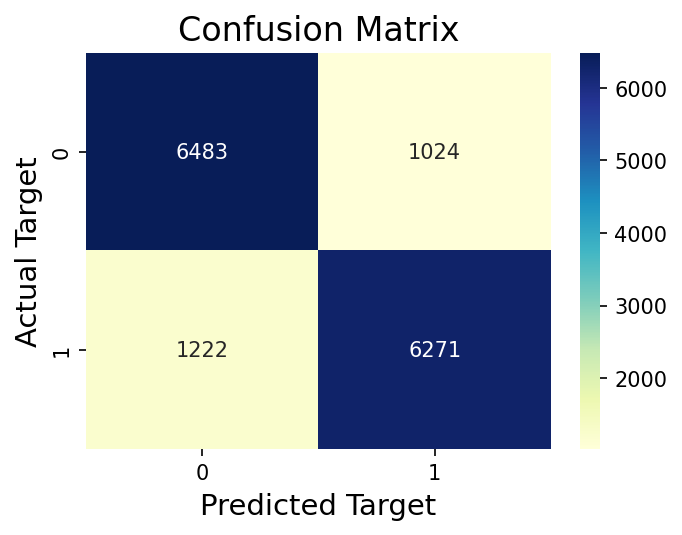

In [ ]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')

**TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df = 25)

X_tfidf = tfidf_vector.fit_transform(X['preprocessed_review'])

tfidf_feature_name = tfidf_vector.get_feature_names()
tfidf_feature_name = np.array(tfidf_feature_name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf = pd.DataFrame(X_tfidf.toarray(), columns  = tfidf_feature_name)
tfidf.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.061968,0.0,0.0,0.0,...,0.0,0.0,0.0,0.214341,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
